In [ ]:
import requests
from bs4 import BeautifulSoup
from time import sleep
import numpy as np
import pandas as pd
from random import randint

name = []
review = []
number_of_review = []
category = []
location = []

pages = np.arange(1, 201, 10)

for page in pages:
    URL = "https://www.yelp.com/search?find_desc=Restaurants&find_loc=San+Francisco%2C+CA&start=" + str(page)
    page = requests.get(URL)
    soup = BeautifulSoup(page.content, 'html.parser')
    
    #Find elements by id.
    results = soup.find(id="main-content")
    
    # Find element by class names.
    restaurants = results.find_all('div', attrs={'class':"y-css-cxcdjj"})
    sleep(randint(2,10))
    
    for restaurant in restaurants:
        Name = restaurant.find('a', class_="y-css-12ly5yx").text
        name.append(Name)
        
        Review =restaurant.find('span', class_="y-css-jf9frv").text
        review.append(Review)
        
        Number_of_Review = restaurant.find('span', class_="y-css-wfbtsu").text
        number_of_review.append(Number_of_Review)
        
        Category = restaurant.find('span', class_="y-css-1cn4gbs").text
        category.append(Category)
        
        Location = [my.text for my in restaurant.find_all('span', class_="y-css-wfbtsu")]
        location.append(Location)


In [352]:
restaurant_details = pd.DataFrame({'Name':name,
                                   'Review':review,
                                   'Number of Review':number_of_review,
                                   'Category':category,
                                   'location':location
                                  })

restaurant_details.to_csv('Restaurant Details.csv')

In [353]:
restaurant_details

,Name,Review,Number of Review,Category,location
0,Bettola,4.8,(15 reviews),Italian,"[(15 reviews), Inner Richmond, Opened 5 weeks ..."
1,Fog Harbor Fish House,4.4,(10.6k reviews),Seafood,"[(10.6k reviews), Fisherman's Wharf, Live wait..."
2,606,4.8,(128 reviews),Hong Kong Style Cafe,"[(128 reviews), North Beach/Telegraph Hill, Li..."
3,Blind Butcher,4.0,(381 reviews),New American,"[(381 reviews), Castro]"
4,Memento SF,4.7,(59 reviews),New American,"[(59 reviews), Noe Valley, Live wait time: 0 m..."
...,...,...,...,...,...
195,Dumpling Kitchen,4.1,(2.2k reviews),Chinese,"[(2.2k reviews), Parkside, Live wait time: 0 m..."
196,Ushi Taro Ramen,5.0,(10 reviews),Ramen,"[(10 reviews), SoMa, Opened 2 weeks ago]"
197,Corks,4.7,(110 reviews),Wine Bars,"[(110 reviews), Inner Richmond]"
198,Causwells,4.2,(1.1k reviews),New American,"[(1.1k reviews), Marina/Cow Hollow]"


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
# Loading dataset
restaurant = pd.read_csv(r'C:\Users\Morakinyo Adewale\Restaurant details.csv')
restaurant.head()

,Unnamed: 0,Name,Review,Number of Review,Category,location
0,0,Bettola,4.8,(15 reviews),Italian,"['(15 reviews)', 'Inner Richmond', 'Opened 5 w..."
1,1,Fog Harbor Fish House,4.4,(10.6k reviews),Seafood,"['(10.6k reviews)', ""Fisherman's Wharf"", 'Live..."
2,2,606,4.8,(128 reviews),Hong Kong Style Cafe,"['(128 reviews)', 'North Beach/Telegraph Hill'..."
3,3,Blind Butcher,4.0,(381 reviews),New American,"['(381 reviews)', 'Castro']"
4,4,Memento SF,4.7,(59 reviews),New American,"['(59 reviews)', 'Noe Valley', 'Live wait time..."


In [8]:
# Checking for missing data
restaurant.isnull().sum()

Unnamed: 0          0
Name                0
Review              0
Number of Review    0
Category            0
location            0
dtype: int64

In [9]:
# Checking for duplicated data
restaurant.duplicated().sum()

0

In [10]:
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        200 non-null    int64  
 1   Name              200 non-null    object 
 2   Review            200 non-null    float64
 3   Number of Review  200 non-null    object 
 4   Category          200 non-null    object 
 5   location          200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [107]:
restaurant['Number of Review'] = restaurant['Number of Review'].str.replace('(', ' ').str.replace(')', ' ').str.replace('reviews', ' ').str.strip()
restaurant

,Name,Review,Number of Review,Category,Location
0,Bettola,4.8,15,Italian,'Inner Richmond'
1,Fog Harbor Fish House,4.4,10.6k,Seafood,"""Fisherman's Wharf"""
2,606,4.8,128,Hong Kong Style Cafe,'North Beach/Telegraph Hill'
3,Blind Butcher,4.0,381,New American,'Castro'
4,Memento SF,4.7,59,New American,'Noe Valley'
...,...,...,...,...,...
195,Dumpling Kitchen,4.1,2.2k,Chinese,'Parkside'
196,Ushi Taro Ramen,5.0,10,Ramen,'SoMa'
197,Corks,4.7,110,Wine Bars,'Inner Richmond'
198,Causwells,4.2,1.1k,New American,'Marina/Cow Hollow'


In [99]:
new = restaurant['location'].str.split(", ", n=2, expand=True)
restaurant['Location'] = new[1].str.replace(']', '')
restaurant = restaurant.drop(['Unnamed: 0', 'location'], axis=1)
restaurant

,Name,Review,Number of Review,Category,Location
0,Bettola,4.8,15,Italian,'Inner Richmond'
1,Fog Harbor Fish House,4.4,10.6k,Seafood,"""Fisherman's Wharf"""
2,606,4.8,128,Hong Kong Style Cafe,'North Beach/Telegraph Hill'
3,Blind Butcher,4.0,381,New American,'Castro'
4,Memento SF,4.7,59,New American,'Noe Valley'
...,...,...,...,...,...
195,Dumpling Kitchen,4.1,2.2k,Chinese,'Parkside'
196,Ushi Taro Ramen,5.0,10,Ramen,'SoMa'
197,Corks,4.7,110,Wine Bars,'Inner Richmond'
198,Causwells,4.2,1.1k,New American,'Marina/Cow Hollow'


In [118]:
def clean_string(x):
    if x == '1k':
        return 1000
    elif x == '1.1k':
        return 1100
    elif x == '1.2k':
        return 1200
    elif x == '1.3k':
        return 1300
    elif x == '1.4k':
        return 1400
    elif x == '1.5k':
        return 1500
    elif x == '1.6k':
        return 1600
    elif x == '1.7k':
        return 1700
    elif x == '1.8k':
        return 1800
    elif x == '1.9k':
        return 1900
    elif x == '2k':
        return 2000
    elif x == '2.1k':
        return 2100
    elif x == '2.2k':
        return 2200
    elif x == '2.4k':
        return 2400
    elif x == '2.5k':
        return 2500
    elif x == '2.6k':
        return 2600
    elif x == '2.8k':
        return 2800
    elif x == '3.3k':
        return 3300
    elif x == '3.4k':
        return 3400
    elif x == '3.5k':
        return 3500
    elif x == '3.6k':
        return 3600
    elif x == '3.7k':
        return 3700
    elif x == '5.2k':
        return 5200
    elif x == '5.3k':
        return 1100
    elif x == '5.4k':
        return 5400
    elif x == '5.5k':
        return 5500
    elif x == '7.2k':
        return 5500
    elif x == '7.6k':
        return 7600
    elif x == '10.6k':
        return 10600
    else:
        return x

Number_of_reviews = restaurant['Number of Review'].apply(clean_string)
restaurant['Number of Review'] = Number_of_reviews.astype(int)
restaurant

,Name,Review,Number of Review,Category,Location
0,Bettola,4.8,15,Italian,'Inner Richmond'
1,Fog Harbor Fish House,4.4,10600,Seafood,"""Fisherman's Wharf"""
2,606,4.8,128,Hong Kong Style Cafe,'North Beach/Telegraph Hill'
3,Blind Butcher,4.0,381,New American,'Castro'
4,Memento SF,4.7,59,New American,'Noe Valley'
...,...,...,...,...,...
195,Dumpling Kitchen,4.1,2200,Chinese,'Parkside'
196,Ushi Taro Ramen,5.0,10,Ramen,'SoMa'
197,Corks,4.7,110,Wine Bars,'Inner Richmond'
198,Causwells,4.2,1100,New American,'Marina/Cow Hollow'


In [161]:
# Which is the most popular category?
most_category = restaurant.groupby(restaurant['Category'], as_index=False)['Number of Review'].sum()
most_category = pop_category.sort_values(by='Number of Review', ascending=False)
most_category[:10].to_csv('most reviewed category.txt')
most_category[:10]

,Category,Number of Review
42,Seafood,27561
32,New American,21836
24,Italian,16989
27,Korean,10299
40,Ramen,7998
5,Burmese,7793
52,Thai,5615
29,Mediterranean,5025
30,Mexican,4995
15,French,4325


<Axes: label='Most reviewed restaurant category by number of reviews', xlabel='Restaurant Category', ylabel='Category'>

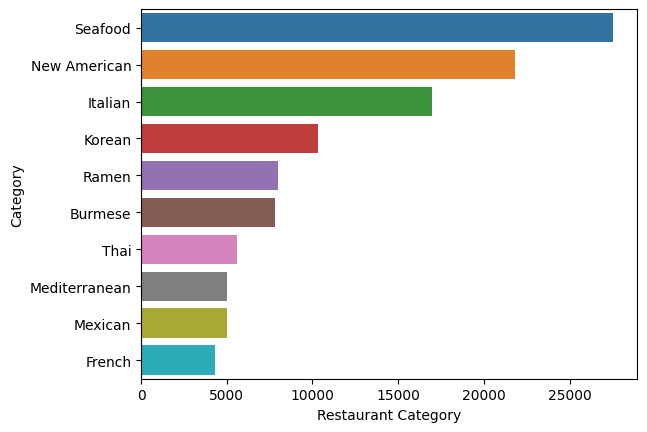

In [138]:
most_reviewed_cat = sns.barplot(y='Category', x='Number of Review', data=most_category[:10], orient='h')
most_reviewed_cat.set_label('Most reviewed restaurant category by number of reviews')
most_reviewed_cat.set_xlabel('Restaurant Category')
most_reviewed_cat

In [159]:
# Most reviewed restaurant location 
most_reviewed_location = restaurant.groupby('Location', as_index=False)['Number of Review'].sum()
most_reviewed_location = most_reviewed_location.sort_values(by='Number of Review', ascending=False)
most_reviewed_location[:10].to_csv('Most reviewed location.txt')
most_reviewed_location[:10]

,Location,Number of Review
27,'North Beach/Telegraph Hill',14340
0,"""Fisherman's Wharf""",14200
13,'Hayes Valley',12527
14,'Inner Richmond',12494
23,'Mission',12061
16,'Japantown',9726
10,'Embarcadero',8161
4,'Castro',7408
19,'Lower Pacific Heights',6413
12,'Financial District',6156


<Axes: label='Most reviewed restaurant location', xlabel='Number of Review', ylabel='Location'>

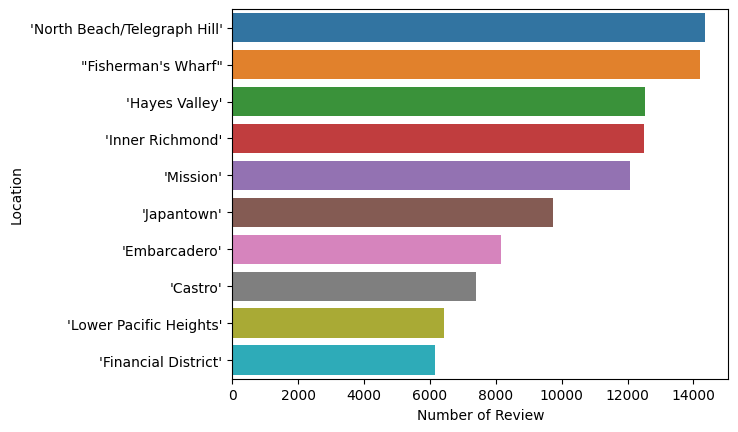

In [158]:
most_reviewed_loc = sns.barplot(y='Location', x='Number of Review', data=most_reviewed_location[:10], orient='h')
most_reviewed_loc.set_label('Most reviewed restaurant location')
most_reviewed_loc

In [154]:
# The restaurant with the highest number of review
most_reviewed = restaurant.groupby('Name', as_index=False)['Number of Review'].sum()
most_reviewed = most_reviewed.sort_values(by='Number of Review', ascending=False)
most_reviewed.to_csv('most reviewed.txt')
most_reviewed

,Name,Number of Review
63,Fog Harbor Fish House,10600
26,Burma Superstar,7600
119,Nopa,5500
76,Hog Island Oyster,5500
156,Sotto Mare,5400
...,...,...
99,M Pot,16
14,Bettola,15
173,The Port of Peri Peri,14
81,Jang,8


<Axes: label='Most reviewed restaurant', xlabel='Number of Review', ylabel='Restaurant Name'>

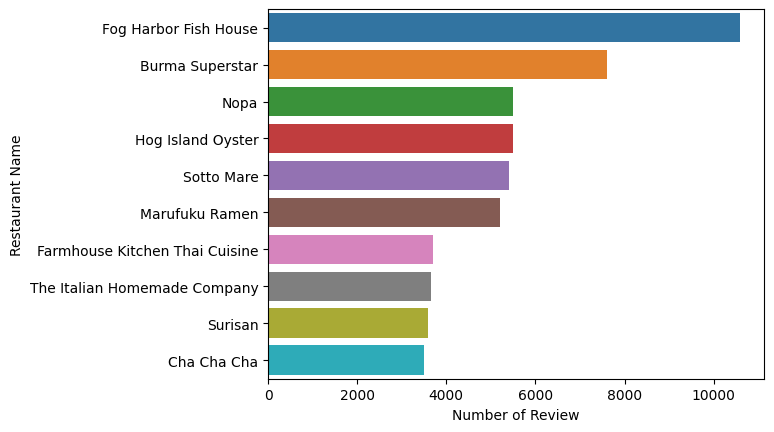

In [156]:
most_reviewed_res = sns.barplot(y='Name', x='Number of Review', data=most_reviewed[:10], orient='h')
most_reviewed_res.set_label('Most reviewed restaurant')
most_reviewed_res.set_ylabel('Restaurant Name')
most_reviewed_res

In [160]:
# Restaurant with the highest review
high_review = restaurant.groupby('Name', as_index=False)['Review'].mean()
high_review = high_review.sort_values(by='Review', ascending=False)
high_review[:20].to_csv('high reviewed restaurant.txt')
high_review[:20]

,Name,Review
146,SHOWA Le Gourmet Tonkatsu,5.0
130,Pasta Supply,5.0
116,Nepa Indian Cuisine,4.9
167,The Hungry Spot,4.9
68,Ganji,4.8
42,Dabao Singapore,4.8
41,DACHA Kitchen & Bar,4.8
93,Limoncello,4.8
99,M Pot,4.8
105,Mashita Galbi Jjim,4.8


<Axes: label='The top 20 restaurant with the highest review', xlabel='Review', ylabel='Restaurant Name'>

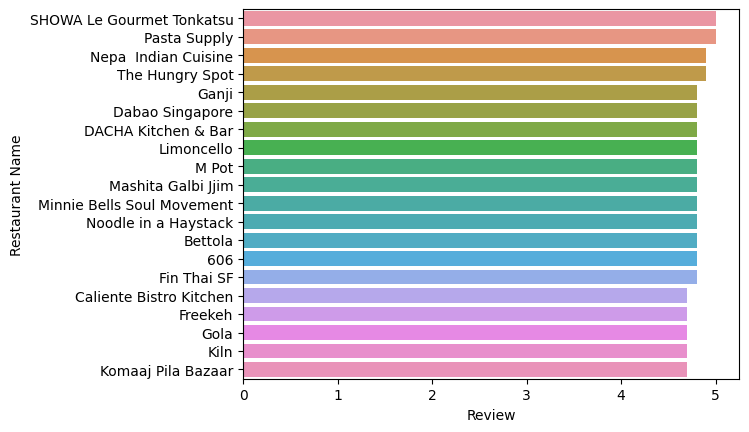

In [151]:
high_review = sns.barplot(y='Name', x='Review', data=high_review[:20], orient='h')
high_review.set_label('The top 20 restaurant with the highest review')
high_review.set_ylabel('Restaurant Name')
high_review